In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_segment_train = pd.read_csv('Customer_segmentation_train.csv')
customer_segment_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
customer_segment_test = pd.read_csv('Customer_segmentation_test.csv')
customer_segment_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [4]:
customer_segment_train.isna().sum(axis=0)

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [5]:
customer_segment_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [9]:
customer_segment_train['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [ ]:
#var1,married,graduated

In [15]:
Modified_train = customer_segment_train

In [16]:
Modified_train['Var_1'] = Modified_train['Var_1'].fillna(Modified_train['Var_1'].value_counts().index[0])

In [17]:
Modified_train['Ever_Married'] = Modified_train['Ever_Married'].fillna(Modified_train['Ever_Married'].value_counts().index[0])

In [18]:
Modified_train['Graduated'] = Modified_train['Graduated'].fillna(Modified_train['Graduated'].value_counts().index[0])

In [19]:
Modified_train.isna().sum(axis=0)

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

In [20]:
Modified_train['Profession'] = Modified_train['Profession'].fillna('None')

In [26]:
# Modified_train['Work_Experience'].median()

In [25]:
Modified_train['Work_Experience'] = Modified_train['Work_Experience'].fillna(Modified_train['Work_Experience'].median())

In [27]:
Modified_train['Family_Size'] = Modified_train['Family_Size'].fillna(Modified_train['Family_Size'].median())

In [28]:
Modified_train.isna().sum(axis=0)

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [29]:
Modified_train.loc[Modified_train['Spending_Score'] =='Low', 'Spending_Score'] = 1

In [30]:
Modified_train.loc[Modified_train['Spending_Score'] =='Average', 'Spending_Score'] = 2

In [31]:
Modified_train.loc[Modified_train['Spending_Score'] =='High', 'Spending_Score'] = 3

In [32]:
Modified_train['Spending_Score'] = Modified_train['Spending_Score'].transform(lambda value:int(value))

In [33]:
Modified_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   int64  
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 693.5+ KB


In [34]:
Modified_test = customer_segment_test

In [35]:
Modified_test['Var_1'] = Modified_test['Var_1'].fillna(Modified_test['Var_1'].value_counts().index[0])
Modified_test['Ever_Married'] = Modified_test['Ever_Married'].fillna(Modified_test['Ever_Married'].value_counts().index[0])
Modified_test['Graduated'] = Modified_test['Graduated'].fillna(Modified_test['Graduated'].value_counts().index[0])
Modified_test['Profession'] = Modified_test['Profession'].fillna('None')
Modified_test['Work_Experience'] = Modified_test['Work_Experience'].fillna(Modified_test['Work_Experience'].median())
Modified_test['Family_Size'] = Modified_test['Family_Size'].fillna(Modified_test['Family_Size'].median())
Modified_test.loc[Modified_test['Spending_Score'] =='Low', 'Spending_Score'] = 1
Modified_test.loc[Modified_test['Spending_Score'] =='Average', 'Spending_Score'] = 2
Modified_test.loc[Modified_test['Spending_Score'] =='High', 'Spending_Score'] = 3
Modified_test['Spending_Score'] = Modified_test['Spending_Score'].transform(lambda value:int(value))
Modified_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2627 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2627 non-null   object 
 5   Profession       2627 non-null   object 
 6   Work_Experience  2627 non-null   float64
 7   Spending_Score   2627 non-null   int64  
 8   Family_Size      2627 non-null   float64
 9   Var_1            2627 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 205.4+ KB


In [36]:
Modified_train = Modified_train.drop('ID',axis=1)
Modified_test = Modified_test.drop('ID',axis=1)

In [37]:
Modified_train_dummies = Modified_train.drop(['Age','Work_Experience','Spending_Score','Family_Size','Segmentation'],axis=1)
Modified_train_notdummies = Modified_train[['Age','Work_Experience','Spending_Score','Family_Size','Segmentation']]
Modified_test_dummies = Modified_test.drop(['Age','Work_Experience','Spending_Score','Family_Size'],axis=1)
Modified_test_notdummies = Modified_test[['Age','Work_Experience','Spending_Score','Family_Size']]

In [38]:
Modified_train_dummies = pd.get_dummies(Modified_train_dummies,drop_first=True)
Modified_test_dummies = pd.get_dummies(Modified_test_dummies,drop_first=True)

In [39]:
df_train = pd.concat([Modified_train_notdummies,Modified_train_dummies],axis=1)

In [40]:
X_test = pd.concat([Modified_test_notdummies,Modified_test_dummies],axis=1)

In [41]:
X = df_train.drop('Segmentation',axis=1)
y = df_train['Segmentation']

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [45]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
import time

In [46]:
def train_test_model(model,X_train,y_train,X_val,y_val):
    tic = time.time()
    model.fit(X_train,y_train)
    toc = time.time()
    
    predictions = model.predict(X_val)
    
    time_taken = toc-tic
    accuracy = accuracy_score(y_val,predictions)
    print('Time taken: ',time_taken)
    print('Test size:',len(y_val))
    print('Total Accuracy: ',accuracy)
    print("Classification Report:\n")
    print(classification_report(y_val,predictions))
    print("Confusion Matrix:\n")
    ConfusionMatrixDisplay.from_estimator(model,X_val,y_val)
    plt.show()
    
    
    return time_taken,accuracy

In [47]:
from sklearn.linear_model import LogisticRegression

Default Log Model:

Time taken:  0.2741353511810303
Test size: 2421
Total Accuracy:  0.5059892606361008
Classification Report:

              precision    recall  f1-score   support

           A       0.42      0.47      0.44       597
           B       0.40      0.16      0.23       552
           C       0.48      0.62      0.54       580
           D       0.64      0.72      0.68       692

    accuracy                           0.51      2421
   macro avg       0.48      0.49      0.47      2421
weighted avg       0.49      0.51      0.48      2421

Confusion Matrix:



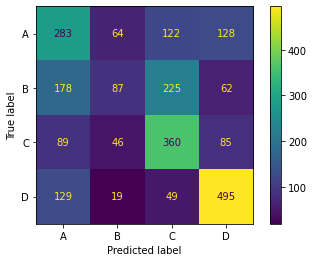

In [48]:
default_log_model = LogisticRegression()
print("Default Log Model:\n")
val1 = train_test_model(default_log_model,scaled_X_train,y_train,scaled_X_val,y_val)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

Default KNN Model:

Time taken:  0.003623485565185547
Test size: 2421
Total Accuracy:  0.46716232961586124
Classification Report:

              precision    recall  f1-score   support

           A       0.36      0.41      0.38       597
           B       0.34      0.33      0.34       552
           C       0.50      0.47      0.49       580
           D       0.65      0.62      0.63       692

    accuracy                           0.47      2421
   macro avg       0.46      0.46      0.46      2421
weighted avg       0.47      0.47      0.47      2421

Confusion Matrix:



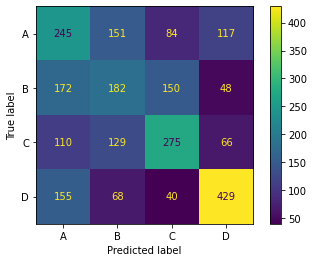

In [50]:
default_KNN_model = KNeighborsClassifier()
print("Default KNN Model:\n")
val2 = train_test_model(default_KNN_model,scaled_X_train,y_train,scaled_X_val,y_val)

In [51]:
from sklearn.tree import DecisionTreeClassifier

Default Decision Tree Model:

Time taken:  0.05291748046875
Test size: 2421
Total Accuracy:  0.4382486575795126
Classification Report:

              precision    recall  f1-score   support

           A       0.35      0.36      0.36       597
           B       0.34      0.36      0.35       552
           C       0.45      0.42      0.43       580
           D       0.60      0.58      0.59       692

    accuracy                           0.44      2421
   macro avg       0.43      0.43      0.43      2421
weighted avg       0.44      0.44      0.44      2421

Confusion Matrix:



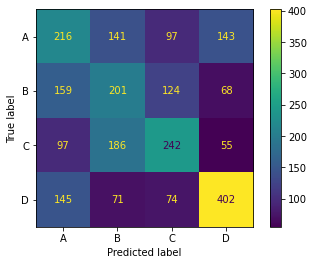

Feature Importances:
 [0.36555857 0.14107736 0.05724834 0.11438543 0.04038595 0.03310325
 0.03587035 0.01917098 0.01230625 0.01600742 0.01486338 0.0187807
 0.00850117 0.00915599 0.01077763 0.0064692  0.01239749 0.0178935
 0.02308276 0.00413005 0.02857573 0.01025851]


In [52]:
default_decision_tree = DecisionTreeClassifier()
print("Default Decision Tree Model:\n")
val3 = train_test_model(default_decision_tree,scaled_X_train,y_train,scaled_X_val,y_val)
print('Feature Importances:\n',default_decision_tree.feature_importances_)

In [53]:
from sklearn.ensemble import RandomForestClassifier

Default Random Forest Model:

Time taken:  1.3455696105957031
Test size: 2421
Total Accuracy:  0.4857496902106567
Classification Report:

              precision    recall  f1-score   support

           A       0.40      0.37      0.39       597
           B       0.37      0.35      0.36       552
           C       0.50      0.48      0.49       580
           D       0.61      0.70      0.65       692

    accuracy                           0.49      2421
   macro avg       0.47      0.47      0.47      2421
weighted avg       0.48      0.49      0.48      2421

Confusion Matrix:



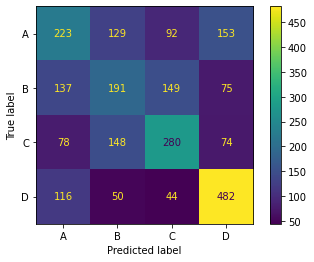

Feature Importances:
 [0.36014331 0.14555284 0.05451843 0.11555594 0.03720066 0.02889341
 0.04063917 0.01823352 0.01803314 0.0210122  0.01174254 0.04135402
 0.01001283 0.01006967 0.01251199 0.00679168 0.00961293 0.01355629
 0.01510962 0.00350998 0.01923793 0.00670791]


In [54]:
default_random_forest = RandomForestClassifier()
print("Default Random Forest Model:\n")
val4 = train_test_model(default_random_forest,scaled_X_train,y_train,scaled_X_val,y_val)
print('Feature Importances:\n',default_random_forest.feature_importances_)

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
from warnings import simplefilter

# ignore all warnings
simplefilter(action='ignore')

Cross validated Log Model:

Time taken:  617.1937117576599
Test size: 2421
Total Accuracy:  0.5055762081784386
Classification Report:

              precision    recall  f1-score   support

           A       0.42      0.47      0.44       597
           B       0.40      0.16      0.22       552
           C       0.48      0.62      0.54       580
           D       0.64      0.72      0.68       692

    accuracy                           0.51      2421
   macro avg       0.48      0.49      0.47      2421
weighted avg       0.49      0.51      0.48      2421

Confusion Matrix:



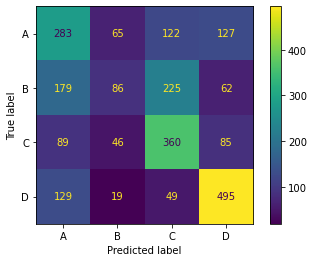

In [57]:
base_log_model = LogisticRegression(solver='saga',penalty='elasticnet',max_iter = 1000)
param_grid = {
    'l1_ratio':np.linspace(0,1,10),
    'C':np.logspace(0,10,10)
}
grid_model = GridSearchCV(base_log_model,param_grid)
print("Cross validated Log Model:\n")
val5 = train_test_model(grid_model,scaled_X_train,y_train,scaled_X_val,y_val)

In [58]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 1.0}

In [59]:
from sklearn.svm import SVC

SVM(with CV): 

Time taken:  206.82418966293335
Test size: 2421
Total Accuracy:  0.5072284180090871
Classification Report:

              precision    recall  f1-score   support

           A       0.41      0.42      0.41       597
           B       0.38      0.33      0.35       552
           C       0.55      0.51      0.53       580
           D       0.62      0.73      0.67       692

    accuracy                           0.51      2421
   macro avg       0.49      0.50      0.49      2421
weighted avg       0.50      0.51      0.50      2421

Confusion Matrix:



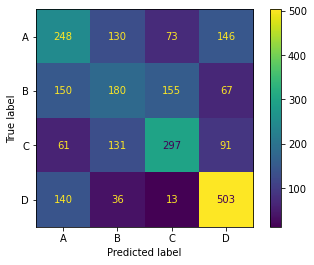

In [60]:
base_svc = SVC(kernel = 'rbf')
param_grid = {
    'C':[0.01,0.1,1,10,100]
}
grid_model_2 = GridSearchCV(base_svc,param_grid)
print('SVM(with CV): \n')
val6 = train_test_model(grid_model_2,scaled_X_train,y_train,scaled_X_val,y_val)


In [61]:
grid_model_2.best_params_

{'C': 1}

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

Gradient Boosting: 

Time taken:  369.37074184417725
Test size: 2421
Total Accuracy:  0.530359355638166
Classification Report:

              precision    recall  f1-score   support

           A       0.45      0.46      0.45       597
           B       0.42      0.34      0.37       552
           C       0.55      0.56      0.55       580
           D       0.64      0.73      0.68       692

    accuracy                           0.53      2421
   macro avg       0.52      0.52      0.52      2421
weighted avg       0.52      0.53      0.52      2421

Confusion Matrix:



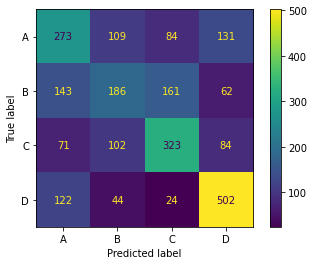

In [63]:
gb_model = GradientBoostingClassifier()
param_grid = {
    'n_estimators':[50,100],
    'learning_rate':[0.05,0.1,0.2],
    'max_depth':[3,4,5]
}
grid_model_3 = GridSearchCV(gb_model,param_grid)
print('Gradient Boosting: \n')
val7 = train_test_model(grid_model_3,scaled_X_train,y_train,scaled_X_val,y_val)


In [64]:
grid_model_3.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [65]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoosting: 

Time taken:  36.381497621536255
Test size: 2421
Total Accuracy:  0.5097067327550598
Classification Report:

              precision    recall  f1-score   support

           A       0.43      0.52      0.47       597
           B       0.39      0.24      0.30       552
           C       0.49      0.57      0.53       580
           D       0.68      0.66      0.67       692

    accuracy                           0.51      2421
   macro avg       0.50      0.50      0.49      2421
weighted avg       0.51      0.51      0.50      2421

Confusion Matrix:



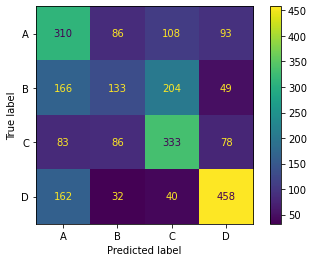

In [66]:
ada_model = AdaBoostClassifier()
param_grid = {
    'n_estimators':[50,100],
    'learning_rate':[0.05,0.1,0.2]
}
grid_model_4 = GridSearchCV(ada_model,param_grid)
print('AdaBoosting: \n')
val8 = train_test_model(grid_model_4,scaled_X_train,y_train,scaled_X_val,y_val)


In [67]:
grid_model_4.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [68]:
out = pd.DataFrame([val1,val2,val3,val4,val5,val6,val7,val8],
                   index = ['Logistic','KNN','Decision Tree','Random Forest','Logistic CV','SVM CV','Gradient Boosting','AdaBoosting'],
                  columns=['Time','Accuracy'])

out.sort_values('Time')

,Time,Accuracy
KNN,0.003623,0.467162
Decision Tree,0.052917,0.438249
Logistic,0.274135,0.505989
Random Forest,1.345570,0.485750
AdaBoosting,36.381498,0.509707
SVM CV,206.824190,0.507228
Gradient Boosting,369.370742,0.530359
Logistic CV,617.193712,0.505576
